In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
!pip install pandas_profiling --upgrade

     |████████████████████████████████| 256kB 8.8MB/s 
     |████████████████████████████████| 10.1MB 30.6MB/s 
     |████████████████████████████████| 112kB 53.1MB/s 
     |████████████████████████████████| 1.1MB 29.6MB/s 
     |████████████████████████████████| 81kB 11.0MB/s 
     |████████████████████████████████| 645kB 28.2MB/s 
     |████████████████████████████████| 3.1MB 37.7MB/s 
     |████████████████████████████████| 61kB 9.7MB/s 
     |████████████████████████████████| 296kB 37.7MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=6408d19a00d840ad2d2c35028f6d680b25b0b0e18dd317fe29488fe8f22e6ffb
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=84a40f3b6d8c2bd40db51d00d949b6dbeadec41383aa909133c3f29c02b8bfaa
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075

In [ ]:
import pandas_profiling as pf 
df = pd.read_csv('/content/perrin-freres-monthly-champagne-.csv')
pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## MANUAL EDA

In [ ]:
# cleaning up the dates
df.columns = ['Months', 'Sales']
df.head()

,Months,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
# dropping thje last two rows
df.drop(106, axis=0, inplace=True)
df.tail()

,Months,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [ ]:
df.drop(105, axis=0, inplace=True)
df.tail()

,Months,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [ ]:
df.dtypes

Months     object
Sales     float64
dtype: object

In [ ]:
# converting the dates to dattime
df['Months'] = pd.to_datetime(df['Months'])

In [ ]:
df.head()

,Months,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [ ]:
# setting the index 
df.set_index('Months', inplace=True)

In [ ]:
df.head()

,Sales
Months,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [ ]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Statistical tests

Text(0.5, 1.0, 'Sales')

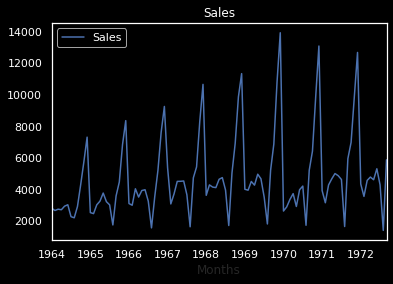

In [ ]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 
            'axes.grid' : False, 
            'text.color': 'white',
            'xtick.color': 'white',
            'ytick.color': 'white'})

df.plot()

plt.title('Sales')

In [ ]:
# testing for stationarity
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(df['Sales'])

In [ ]:
## H0: It is non stationary 
## H1: it is stationary

def adfuller_test(sales):
  result = adfuller(sales)
  labels = ['ADF TEST STATISTIC', 'P-VALUE', 'LAGS USED', 'NO. OF OBSVERATIONS USED']
  for value, label in zip(result, labels):
    print(label + ': ' + str(value))
    print()
  if result[1] <= 0.05:
    print('Strong evidence against null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.')
  else:
    print('Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.')


In [ ]:
adfuller_test(df['Sales'])

ADF TEST STATISTIC: -1.8335930563276226

P-VALUE: 0.3639157716602452

LAGS USED: 11

NO. OF OBSVERATIONS USED: 93

Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


In [ ]:
## DIFFERENCING
## making data stationary 
## data does have seasonality therefore will be shifting by 12
## 12 coz data is spread by month wise

df['Sales_first_diff'] = df['Sales'] - df['Sales'].shift(12)
adfuller_test(df['Sales_first_diff'].dropna())

ADF TEST STATISTIC: -7.626619157213164

P-VALUE: 2.060579696813685e-11

LAGS USED: 0

NO. OF OBSVERATIONS USED: 92

Strong evidence against null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.


Text(0.5, 1.0, 'Removed-stationary')

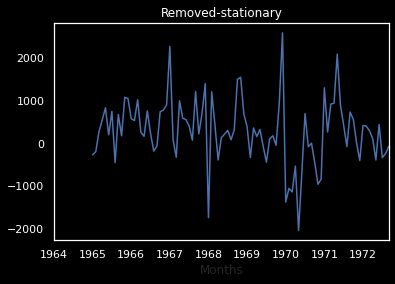

In [ ]:
df['Sales_first_diff'].plot()
plt.title('Removed-stationary')


## ARIMA

Final Thoughts on Autocorrelation and Partial Autocorrelation¶

* Identification of an AR model is often best done with the PACF.
  * For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

* Identification of an MA model is often best done with the ACF rather than the PACF.
  * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q p AR model lags d differencing q MA lags

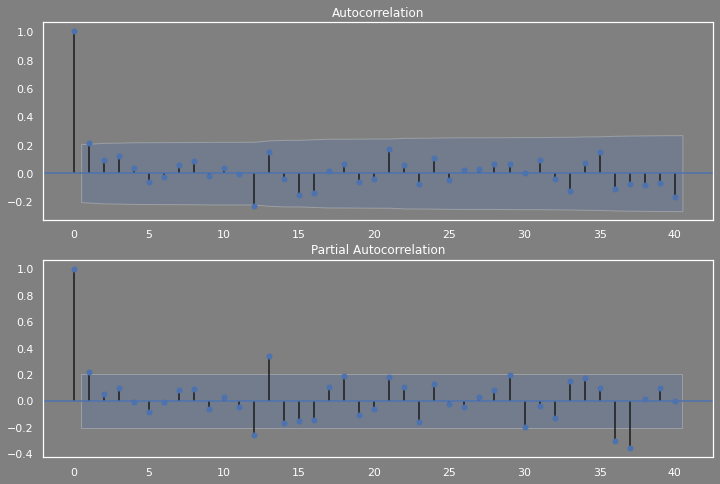

In [ ]:
# how to take the p value for arima model depends on pacf and acf plots 

from statsmodels.graphics.tsaplots import plot_acf, plot_acf
import statsmodels.api as sm

sns.set(rc={'axes.facecolor':'grey', 'figure.facecolor':'grey', 
            'axes.grid' : False, 
            'text.color': 'white',
            'xtick.color': 'white',
            'ytick.color': 'white'})
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Sales_first_diff'].iloc[13:], lags=40, ax=ax1)
print()
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Sales_first_diff'].iloc[13:], lags=40, ax=ax2)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# p = 1 := shuts off after 1 as seen from pcaf plot 
# d = 1 := no of times differencing dome to remove seasonality = 1
# q = 1 := exponential decrease till 1, can also take the value of 0

model = ARIMA(df['Sales'], order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Mon, 14 Jun 2021   AIC                           1910.251
Time:                        08:40:25   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7837     12.405      1.837      0.069      -1.530      47.097
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

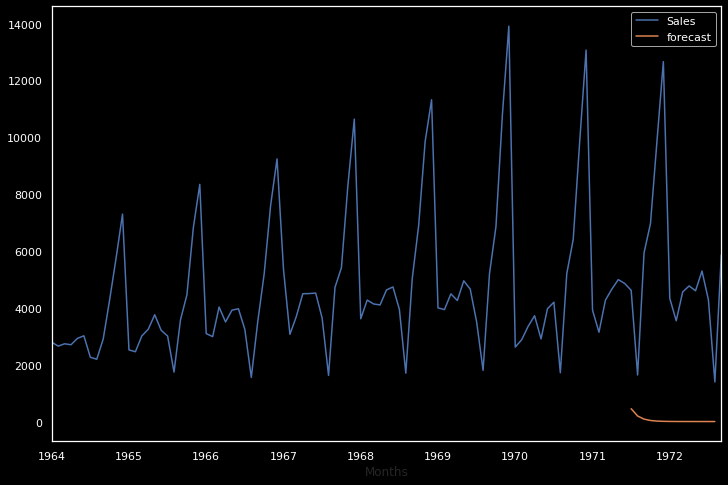

In [ ]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 
            'axes.grid' : False, 
            'text.color': 'white',
            'xtick.color': 'white',
            'ytick.color': 'white'})
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

## SARIMA

In [ ]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Mon, 14 Jun 2021   AIC                           1486.804
Time:                                    08:32:14   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (Q):                       40.24   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.46   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

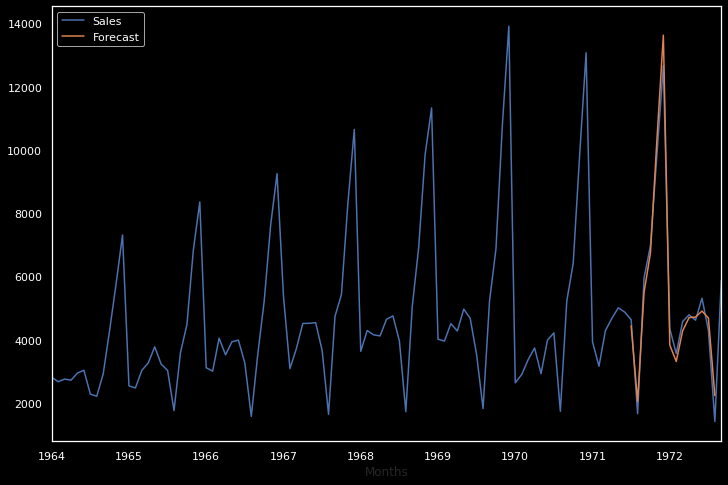

In [ ]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 
            'axes.grid' : False, 
            'text.color': 'white',
            'xtick.color': 'white',
            'ytick.color': 'white'})
df['Forecast'] = results.predict(start=90, end=103, dynamic=True)
df[['Sales', 'Forecast']].plot(figsize=(12,8))

In [ ]:
# future forecasting
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,24)]
future_dataset = pd.DataFrame(index=future_dates[1:], columns=df.columns)
future_dataset.tail()

,Sales,Sales_fist_diff,Sales_first_diff,Forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


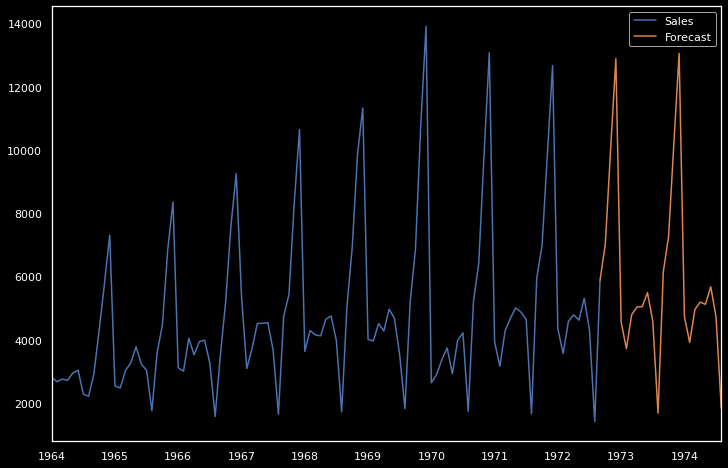

In [ ]:
future_df = pd.concat([df, future_dataset])

future_df['Forecast'] = results.predict(start=104, end=150, dynamic=True)
future_df[['Sales', 'Forecast']].plot(figsize=(12,8))